### Numerical differentiation and integration

#### Take-aways

After studying this notes, we will be able to

**Numerical differentiation**

- use basic numerical differentiation to approximate derivatives,
  - write forward/backward/centered different quotient,
  - derive an accelerated method from another method using Richardson's extrapolation, 
- explain inherent difficulty of numerical differentiation,
- prove the order of accuracy of each basic numerical differentiation,

**Quadrature (numerical integration)**

- explain how Newton-Cotes formula works,
  - explain the idea behind Newton-Cotes formula,
  - derive Newton-Cotes formula for a given order,
- explain how Gaussian quadrature works,
  - explain the idea behind Gaussian quadrature,
  - derive Gaussian quadrature associated to a constant weight function and for a given order,
  - give the definition of orthogonal functions with respect to a weighted-integeral-induced inner product,
  - find a set of orthogonal functions given a weighted integral,
  - verify accuracy of Gaussian quadrature directly from manual check,
- explain composite rules,
  - carry out change of intervals for integrals and quadrature formulas,
  - construct a composite rule from a given Newton-Cotes formula and Gaussian quadrature, 
- summarize basic facts related to quadrature,
  - summarize what methods are available for numerical integrations,
  - summarize basic properties of orthogonal functions: they are oscilatory and have distinct zeros inside the interval
- conduct error analysis for the methods covered,
  - prove general error estimates of Newton-Cotes formulas,
  - prove general error estimates of composite Newton-Cotes formulas,
  - prove the accuracy of Gaussian quadrature,
  <!-- - prove the optimality of Gaussian quadrature,
  - prove error estimates of Gaussian quadrature with the error formula of Hermite interpolation provided,
  - prove error estimates of composite Gaussian quadrature with the error formula of Hermite interpolation provided, -->


#### Overview

##### Problem of interest

> ***Problem of interest***
>
>  - (numerical differentiation) 
>   Assuming only function evaluations $f$ are feasibles, but not $f^\prime$,  find an approximation of  $f^\prime(x)$
> - (numerical integration/quadrature) 
>   Assuming function evaluations $f$ are available, find an approximation of $\int_{a}^{b} f(x) dx$ for some $a < b$.

##### Methods 

(Numerical differentiation)

1. Forward difference quotient
2. Backward difference quotient
3. Centered difference quotient
4. Richardson's extrapolation

(Quadrature or Numerical integration)

1. Newton-Cotes's method
   1. Trapezoidal rule
   2. Simpson's rule
   3. Higher order method
2. Gaussian quadrature
3. Composite methods of the above

#### Forward/Backward/Centered difference quotient (Num Diff)

##### Method

![Forward/Backward difference quotient](https://jhparkyb.github.io/resources/notes/na/104ASlides_NumDiffInt006.png)

![Centered difference quotient](https://jhparkyb.github.io/resources/notes/na/104ASlides_NumDiffInt007.png)

##### Analysis

[Proof of convergence of forward/backward difference quotient (Exercise)]()

[Proof of convergence of centered fifference quotient](https://jhparkyb.github.io/resources/notes/na/104ABoardWork_NumDiffInt001.png)

#### Richardson's extrapolation

Richardson's extrapolation is a trick to obtain a more accurate numerical method out of another method. This very useful trick is not very different from middle school mathematics. 

![Repeated decimal to fraction](https://wtskills.com/wp-content/uploads/2021/04/image-617-768x317.png)

Figure: https://wtskills.com/

> **Example** (Accelerating centered difference quotient)
>
> [Accelerating centered difference quotient 1](https://jhparkyb.github.io/resources/notes/na/ex_RichardsonExtrapCenDiff1_lp2000.png)
>
> [Accelerating centered difference quotient 2](https://jhparkyb.github.io/resources/notes/na/ex_RichardsonExtrapCenDiff2_lp2000.png)

> **Question**
>
> What do you think is it more of? A magic or clever idea but not quite a magic? Why?
>
> (Reminder) This is **about atmosphere**, not getting it right.
> 
> 1. Think for a short time.
> 2. Share your guess with your pair.
> 3. Type your answer in clicker.
> 4. Feel free to say out loud.

##### Inherent difficulty of numerical differentiation

Rounding error may destroy everything if you pursue too much precision.

> **Example** 
> 
> - $f'(x)=\frac{f(x+h) - f(x-h)}{2h}+{\mathcal{O}\!\left( h^2 \right)} $  tells you the smaller $h$ gets the more accurate the approximation is. 
> - Every time you store something you have rounding error. Thus, what you really compute is $$\frac{f(x+h) + e_1 - f(x-h)-e_2}{2h} = \frac{f(x+h)  - f(x-h)}{2h} + \frac{e_1 -e_2}{2h},$$ where $e_1, e_2$ represent rounding errors.
> - 2nd term may amplify the error as $h$ gets smaller. 
> - Or, the numerator may just be zero to the computer since they are so close: leading to $f'(x)=0$.

![Limitation of numerical differentiation](https://upload.wikimedia.org/wikipedia/commons/4/41/AbsoluteErrorNumericalDifferentiationExample.png)


               h  centered diff quot         error
0   1.000000e+00            3.194528  4.762462e-01
1   1.000000e-01            2.722815  4.532735e-03
2   1.000000e-02            2.718327  4.530492e-05
3   1.000000e-03            2.718282  4.530467e-07
4   1.000000e-04            2.718282  4.530566e-09
5   1.000000e-05            2.718282  5.858691e-11
6   1.000000e-06            2.718282  1.634572e-10
7   1.000000e-07            2.718282  5.858736e-11
8   1.000000e-08            2.718282  6.602751e-09
9   1.000000e-09            2.718282  6.602751e-09
10  1.000000e-10            2.718281  6.727366e-07
11  1.000000e-11            2.718292  1.042949e-05
12  1.000000e-12            2.718492  2.102696e-04
13  1.000000e-13            2.717826  4.558642e-04
14  1.000000e-14            2.708944  9.337648e-03
15  1.000000e-15            2.886580  1.682980e-01
16  1.000000e-16            0.000000  2.718282e+00
17  1.000000e-17            0.000000  2.718282e+00
18  1.000000e-18            0.0

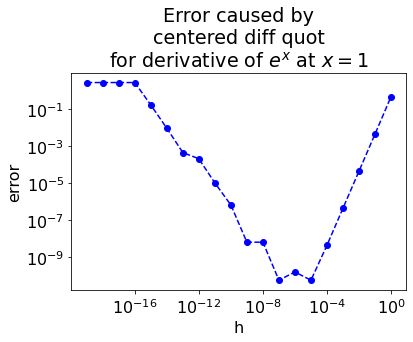

In [14]:
"""
This example shows errorneous behavior of numerical differentiation when we take too small spacing.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

# set the parameters
N = 20
x0 = 1.
f = lambda x: np.exp(x)
fp = lambda x: np.exp(x)

# some intitial tasks
der_true = fp(x0)

# create an array for many different h's (vectorized computing)
hh = 10.**(-np.arange(N))

# compute 'cdq': standing for 'centered difference quotient'
cdq = (f(x0 + hh) - f(x0 - hh))/(2*hh)

# report the result in DataFrame
cols = ["h", "centered diff quot", "error"]
df = pd.DataFrame(columns=cols)
df['h'] = hh
df['centered diff quot'] = cdq
df['error'] = np.abs(cdq - der_true)

print(df)

# plot the result
fig, ax = plt.subplots()

ax.plot(df['h'][::-1], df['error'][::-1], "ob--")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("h")
ax.set_ylabel("error")
ax.set_title("Error caused by\ncentered diff quot\nfor derivative of $e^x$ at $x=1$")

plt.show()


> **Remark** (computation tips)
>
> Observe  
> - that the above code only uses what we covered in the programming basics, and
> - how vectorized coding and slicing makes the code concise 
>   - (vectorization + broadcasting) there are no `for` loops, hence concise and fast,
>   - (slicing) there is no extra copy for plotting reversed $h$ values. (Try getting rid of `[::-1]` and plotting it.)

**Transition**: Below, we are now studying numerical integrations (a.k.a. *quadrature*)

> ***Problem of interest***
>
> - (numerical integration/quadrature) 
>   Assuming function evaluations $f$ are available, find an approximation of $\int_{a}^{b} f(x) dx$ for some $a < b$.

#### Newton-Cotes formula (Quadrature)

##### Method

- Idea: Integrate a similar function that is simple instead of $f$: interpolating polynomial.

> **Definition** (Newton-Cotes formula)
>
> Given $a<b$, let $x_i = a + di$ ($i=0,1,\cdots,n$), where $d=(b-a)/n$, be *equally spaced nodes* on $[a,b]$. Then, the *Newton-Cotes formula* of order $n$ (or degree $n$) for  $\int_a^b f(x)dx$ is given by
> $$\sum_{i=0}^n A_i f(x_i),$$
> where 
> $$A_i = \int_a^b \ell_i(x) dx \quad \text{and} \quad 
    \ell_{i}(x)=\prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x-x_{j}}{x_{i}-x_{j}}.$$


1. Degree 1: Trapezoidal rule
    ![Trapezoidal rule](https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Trapezoidal_rule_illustration.svg/440px-Trapezoidal_rule_illustration.svg.png)
    
    $$\int_{a}^{b} f(x) d x \approx \frac{b-a}{2}[f(a)+f(b)]$$

    <!-- ![Trapezoidal rule](https://jhparkyb.github.io/resources/notes/na/104ASlides_NumDiffInt015.png) -->
2. Degree 2: Simpson's rule
   ![Simpson's rule](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Simpsons_method_illustration.svg/440px-Simpsons_method_illustration.svg.png)

   $$\int_a^b f(x) d x \approx \frac{b-a}{6}\left[f(a)+4 f\left(\frac{a+b}{2}\right)+f(b)\right]$$
3. Degree 3 or above is possible.


##### Summary (Newton-Cotes)

- Newton-Cotes rule (single interval) of order $n$ is obtained by 
    1. dividing the interval evenly into $n$ pieces, hence $n+1$ nodes, 
    1. finding an interpolating polynomial $p\in\Pi_n$ of $f$ on the nodes, and 
    1. integrating $p$ instead of $f$: $\int_a^b p(x)dx$.
- The general error of Newton-Cotes rule (single) interval of order $n$ is ${\mathcal{O}\!\left( (b-a)^{n+2} \right)}$.
- The error of Simpson's rule ($n=2$) is better than the general accuracy: ${\mathcal{O}\!\left( (b-a)^{5} \right)}$

##### Analysis: Error of Newton-Cotes formula

> **Theorem** (Error of Newton-Cotes formular: single interval)
>
> Suppose $h>0$ and $f$ is smooth on $[a,a+h]$. Newton-Cotes formula of degree $n$ on $[a,a+h]$ satisfies
> $$
> \left|\int_{a}^{a+h} f(x) d x-\sum_{i=0}^{n} A_{i} f\left(x_{i}\right)\right| \leq \frac{\hat M}{(n+1) !}h^{n+2},
> $$
> where $\hat M:=\max_{a\le x \le a+h} |f^{(n+1)}(x)|$ and $x_{i}=a+ ih/n$ ($i$--th node; $i=0,1,2,\cdots,n$).



#### Composite rules

**Motivation**: We may need higher accuracy of integrals. But higher order interpolations would not do the job (Runge's phenomenon). Instead, we chop the interval into smaller pieces, use a low order quadrature formula for small intervals, and add them up.

$$``\sum_{\text{subintervals}} (\text{quadrature on each subinterval})"$$

![Composite rules](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Composite_trapezoidal_rule_illustration_small.png/1600px-Composite_trapezoidal_rule_illustration_small.png?20070922134859) 

![Composite Simpson's rule](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Simpson%27s_One-Third_Rule.gif/440px-Simpson%27s_One-Third_Rule.gif)

##### Change of intervals

**Motivation**: Composite rules lead to applying a quadrature rule (single interval) to many different intervals, and we need to recompute quadrature formulas for each interval. But this can be done more efficiently using change of intervals. For example, 4 subintervals lead to quadrature rules on 4 different intervals: 
    $$\begin{split}
    \int_{0}^1 f(x) dx & = \int_{0}^{1/4} f(x)dx + \int_{1/4}^{1/2} f(x)dx \\ 
        &+ \int_{1/2}^{3/4} f(x)dx + \int_{3/4}^{1} f(x)dx 
    \end{split} $$

![Change of interval](https://jhparkyb.github.io/resources/notes/na/104ASlides_NumDiffInt020.png)

Guidelines
1. Show $$\lambda(t)= \frac{b-a}{d-c} t + \frac{ad-bd}{d-c}.$$
2. Carry out change of integral.
3. Apply Newton-Cotes on $t$--domain.

[Derivation of quadrature formula for a new interval](https://jhparkyb.github.io/resources/notes/na/104ABoardWork_NumDiffInt011.png)


> **Example** (Composite Trapezoidal rule)
>
> ![Composite trapezoidal rule](https://jhparkyb.github.io/resources/notes/na/104ASlides_NumDiffInt016.png)



##### Analysis: Error of composite Newton-Cotes formula

> **Theorem** (Error of Newton-Cotes formular: single interval)
>
> Suppose $f$ is smooth on $[a,b]$. The composite Newton-Cotes formula of degree $n$ involving $k$ uniform subintervals satisfies
> $$
> \left|\int_{a}^{b} f(x) d x-\sum_{j=1}^k \sum_{i=0}^{n} A_{i} f\left(x_{j,i}\right)\right| \leq \frac{M(b-a)}{(n+1) !}h^{n+1} ,
> $$
> where $M:=\max_{a\le x \le b} |f^{(n+1)}(x)|$ and $x_{j,i}=a+(j-1)h + ih/n$ ($i$--th node in $j$--th subinterval; $i=0,1,2,\cdots,n$ and  $j=1,2,\cdots,k$).



#### Gaussian Quadrature

##### Preliminary concepts

> **Weighted integrals**
> 
> We sometimes want to weight differently when summing up or integrate: for some weight function $w:[a,b]\to(0,\infty)$, 
> 
> $$\int_a^b f(x) {\color{red}w(x)} dx.$$

> **Motivation** (Quadrature formula for Weighted integrals)
>
> Let $w$ be some some positive weight function. Then, for any distinct $x_0, x_1, \cdots, x_n\in[a,b]$, the quadrature formula
> 
> $$\sum_{i=0}^{n} \tilde A_i f(x_i)$$ 
> 
> is $\Pi_n$-exact, where, $\tilde A_i = \int_a^b \ell_i(x) {\color{red}w(x)} dx$.
>
> Can we do better? How?


> **Definition** (Orthogonal functions)
>
> Let $w$ be some some positive weight function and functions $p(x)$ and $q(x)$ are defined on $[a,b]$. We way they are *orthogonal* with respect to $\int_a^b (\ \cdot \ , \ \cdot \ )w(x)dx$ or simply with respect to $w$ if
> $$\int_a^b p(x)q(x)w(x)dx=0.$$

> **Remark**
>
> $\int_a^b (\ \cdot \ , \ \cdot \ )w(x)dx$ is in fact an inner product (generalization of dot product).

> **Theorem** (Accuracy of Gaussian quadrature)
>
> Let $w$ be a positive weight function and $q\in\Pi_{n+1}$ be $w$--orthogonal to $\Pi_n$, that is, $\int_a^b q(x)p(x)w(x)dx=0$ ($\forall p\in\Pi_n$). If $x_0, x_1, \cdots, x_n\in[a,b]$ are chosen to be the zeros of $q$, then the quadrature  $\sum_{i=0}^{n} \tilde A_i f(x_i)$ is $\Pi_{2n+1}$--exact, where $\tilde A_i = \int_a^b \ell_i(x) w(x)dx$. 
>

> **Definition** (Gaussian Quadrature)
>
> The quadrature appearing in the theorem is called *Gaussian quadrature*.

[Proof of accuracy of Gaussian quadrature](https://jhparkyb.github.io/resources/notes/na/104ABoardWork_NumDiffInt016.png)

> **Example** (Gauss-Legendre)
> 
> | Nodes | Weights |
> |:-:|:-:|
> | $$-\frac{1}{\sqrt{3}}, \ \frac{1}{\sqrt{3}}$$ | $1$, $1$ |
> | $$-\sqrt{\frac{3}{5}}, \ 0, \ \sqrt{\frac{3}{5}}$$ | $$\frac{5}{9},\ \frac{8}{9}, \ \frac{5}{9}$$ |
> 
> ![Gauss-Legendre2](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Comparison_Gaussquad_trapezoidal.svg/1920px-Comparison_Gaussquad_trapezoidal.svg.png)
>
> Figure: Wikipedia

[Nodes and weights of more Gauss-Legendre quadratures](https://en.wikipedia.org/wiki/Gaussian_quadrature#Gauss%E2%80%93Legendre_quadrature)

##### Example code of Gauss-Legendre3 

In [ ]:
import numpy as np

def gauss3(height, a: float, b:float):
    """
    Return approximate integral using Gauss-Legendre3 quadrature
    
    INPUT
        f: function to integrate (lambda or explicite function)
        a, b: lower and upper limits of the interval of integral
    OUPUT
        approximate integral
    """

    # Gauss-Legendre3 nodes for [-1,1]
    tmp = np.sqrt(3.0/5)
    ref_nodes = np.array([-tmp, 0, tmp])

    # Gauss-Legendre3 nodes for [0,1]
    ref_nodes = (ref_nodes + 1)/2 
    
    # Gauss-Legendre3 weights (weights are the same for any interval)
    g3_weights = np.array([5./9, 8./9, 5./9])
    
    # left end points of subintervals 
    left_pts = a

    # Gauss-Legendre3 nodes for the interval [a,b]
    xx = left_pts + (b-a)*ref_nodes # broadcasting in effect

    # evaluate functions at all nodes
    height = f(xx)

    # extract heights at middle nodes (weight 8/9 will apply)
    height_mid = height[1] 

    # extract heights at middle nodes (weight 5/9 will apply)
    height_side = height[[0,2]]

    # (b-a)/2 comes from change of interval
    return (b-a)/2*(g3_weights[0]*np.sum(height_side) + g3_weights[1]*np.sum(height_mid))

f = lambda x: x**5 #np.sin(np.pi*x)
a = 0
b = 1

num_int = gauss3(f, a, b)

print(f"integral of f from {a} to {b} \n using Gauss-Legendre3: \n     {num_int}")

##### Example code of composite Gauss-Legendre3 


### Tips

- Use broadcasting for nodes and weights (review `numpy_basics.ipynb` if necessary).
  For example,  3-by-1 + 1-by-5 = 3-by-5. 
  $$\begin{bmatrix} 9 \\ 8 \\ 7 \end{bmatrix} + \begin{bmatrix} 10 & 20 & 30 & 40 & 50 \end{bmatrix}  = \begin{bmatrix} 19 & 29 & 39 & 49 & 59 \\ 18 & 28 & 38 & 48 & 58 \\ 17 & 27 & 37 & 47 & 57 \end{bmatrix}$$

(nodes array, $x_{i,j}=$ $i$-th Gauss-Legendre3 node of $j$-th subinterval)
|Subinterval| $[x_0, x_1]$ | $[x_1, x_2]$| $[x_2, x_3]$| ... | $[x_{k-1}, x_k]$|
|:-:|:-:|:-:|:-:|:-:|:-:|
|array entry| $x_{0,0}$ | $x_{0,1}$ | $x_{0,2}$ | ... | $x_{0,k-1}$ |
|array entry| $x_{1,0}$ | $x_{1,1}$ | $x_{1,2}$ | ... | $x_{1,k-1}$ |
|array entry| $x_{2,0}$ | $x_{2,1}$ | $x_{2,2}$ | ... | $x_{2,k-1}$ |   

(weight array)
|Subinterval| $[x_0, x_1]$ | $[x_1, x_2]$| $[x_2, x_3]$| ... | $[x_{k-1}, x_k]$|
|:-:|:-:|:-:|:-:|:-:|:-:|
|array entry| 5/9 | 5/9 | 5/9 | ... | 5/9 |
|array entry| 8/9 | 8/9 | 8/9 | ... | 8/9 |
|array entry| 5/9 | 5/9 | 5/9 | ... | 5/9 | 

    

In [ ]:
import numpy as np

def comp_gauss3(height, a: float, b:float, k: int):
    """
    Return approximate integral using composite Gauss-Legendre3 quadrature
    
    INPUT
        f: function to integrate (lambda or explicite function)
        a, b: lower and upper limits of the interval of integral
        k: #of subintervals of composite version
    OUPUT
        approximate integral
    """

        # Gauss-Legendre3 nodes for [-1,1]
    tmp = np.sqrt(3.0/5)
    ref_nodes = np.array([-tmp, 0, tmp])

    # Gauss-Legendre3 nodes for [0,1]
    ref_nodes = (ref_nodes + 1)/2 
    
    # Gauss-Legendre3 weights (weights are the same for any interval)
    g3_weights = np.array([5./9, 8./9, 5./9])
    
    # left end points of subintervals
    h = (b-a)/k 
    left_pts = np.arange(a, b, h)

    # array for all nodes for the quadrature
    # each column corresponds to Gauss-Legendre3 nodes for each subinterval
    xx = left_pts + h*ref_nodes.reshape((-1,1)) # broadcasting in effect

    # evaluate functions at all nodes
    height = f(xx)

    # extract heights at middle nodes (weight 8/9 will apply)
    height_mid = height[1,:] 

    # extract heights at middle nodes (weight 5/9 will apply)
    height_side = height[[0,2],:]

    # h/2 comes from change of interval
    return h/2*(g3_weights[0]*np.sum(height_side) + g3_weights[1]*np.sum(height_mid))

f = lambda x: np.sin(np.pi*x)
a = 0
b = 1
k = 5

num_int = comp_gauss3(f, a, b, k)

print(f" integral of f from {a} to {b} \n using composite Gauss-Legendre3 \n with {k} subinterval: \n       {num_int}")

> **Theorem** (The accuracy of Gaussian quadratures are best possible) 
> 
> No quadrature rule for integrals over $[a,b]$ with respect to positive a weight function that involves $(n+1)$ nodes can be exact for $\Pi_{2n+2}$.

<!-- (Proof) 

For any nodes $x_0, x_1, \cdots, x_n \in [a,b]$, consider $g(x)=\prod_{i=0}^n (x-x_i)^2$. Then, $g\in\Pi_{2n+2}$ and strictly positive except at a finite number of points. Thus, $\int_a^b g(x)w(x)dx > 0$. However, for any quadrature rule of the type $\sum_{i=0}^n \tilde A_i g(x_i)$ results in $0$. Therefore, it cannot be $\Pi_{2n+2}$-exact. -->

Concern: What if the the roots of the orthogonal polynomials are complex, repeated, or outside the interval?

> **Theorem** (Oscillatory behavior of orthogonal functions)
>
> 

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)